In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv("covid_19_india.csv",parse_dates=["Date"],dayfirst=True)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df=df[["Date","State/UnionTerritory","ConfirmedIndianNational","ConfirmedForeignNational","Cured","Deaths","Confirmed"]]
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3


In [4]:
maha=df[df["State/UnionTerritory"]=="Maharashtra"]
maha.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,2020-03-09,Maharashtra,2,0,0,0,2
91,2020-03-10,Maharashtra,5,0,0,0,5
97,2020-03-11,Maharashtra,2,0,0,0,2
120,2020-03-12,Maharashtra,11,0,0,0,11
133,2020-03-13,Maharashtra,14,0,0,0,14


# Rename the columns

In [5]:
maha.columns=["date","state/ut","confindian","conforeign","cured","deaths","confirmed"]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

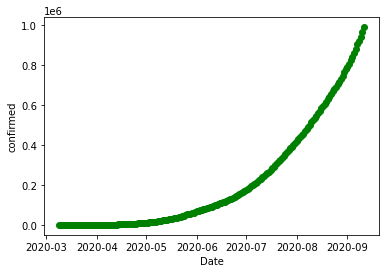

In [8]:
plt.xlabel("Date")
plt.ylabel("confirmed")
plt.scatter(maha.date,maha.confirmed,color="g")


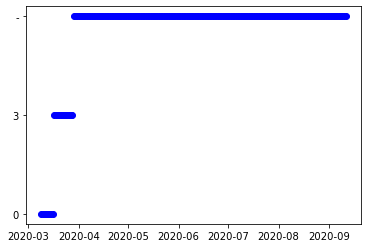

In [9]:
plt.scatter(maha.date,maha.conforeign,color="b")

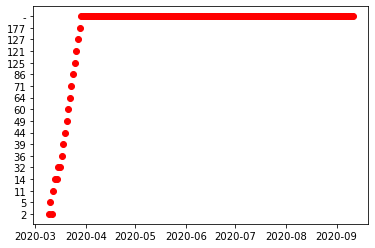

In [10]:
plt.scatter(maha.date,maha.confindian,color="r")

<AxesSubplot:xlabel='date', ylabel='confirmed'>

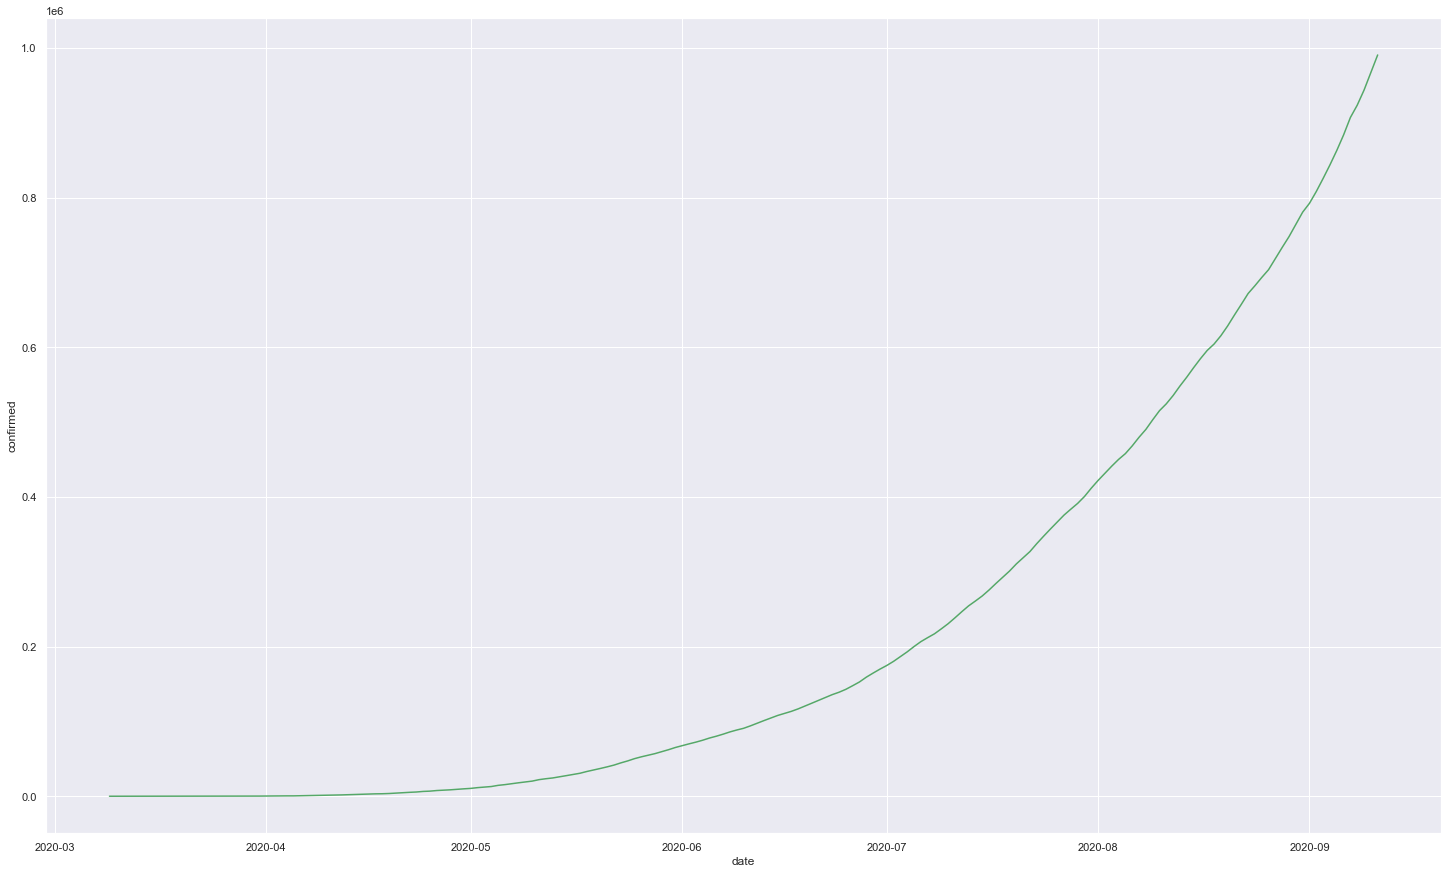

In [11]:
sns.set(rc={'figure.figsize':(25,15)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")


In [12]:
import datetime as dt

In [13]:
maha["date"]=maha["date"].map(dt.datetime.toordinal)
maha.head()

<ipython-input-13-5ae5f3b61138>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha["date"]=maha["date"].map(dt.datetime.toordinal)


,date,state/ut,confindian,conforeign,cured,deaths,confirmed
76,737493,Maharashtra,2,0,0,0,2
91,737494,Maharashtra,5,0,0,0,5
97,737495,Maharashtra,2,0,0,0,2
120,737496,Maharashtra,11,0,0,0,11
133,737497,Maharashtra,14,0,0,0,14


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [78]:
x=maha[["date"]]
y=maha[["confirmed"]]
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x,y,test_size=0.2)

In [79]:
print(xtrain1.size)
print(ytrain1.size)

149
149


In [80]:
xtrain1.shape#i dont wanna the columns

(149, 1)

In [81]:
model=SVR(kernel = 'linear',gamma=10)
model.fit(np.array(xtrain1).reshape(-1,1),np.array(ytrain1).reshape(-1,1))

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(gamma=10, kernel='linear')

In [82]:
ypred1=model.predict(np.array(xtest1).reshape(-1,1))
print(ypred1)

[204253. 161188. 127258. 298213. 273418. 162493. 208168. 294298. 359548.
 279943. 196423. 129868. 363463. 148138. 152053. 306043. 128563. 311263.
 303433. 296908. 354328. 193813. 249928. 268198. 200338. 230353. 345193.
 185983. 199033. 304738. 145528. 343888. 272113. 326923. 191203. 206863.
 323008. 286468.]


In [88]:
print(np.array(ytest1).reshape(-1,1))
ytested1=np.array(ytest1).reshape(-1,1)

[[ 23401]
 [  1135]
 [    14]
 [337607]
 [192990]
 [  1364]
 [ 27524]
 [310455]
 [923641]
 [223724]
 [ 15525]
 [    32]
 [990795]
 [   198]
 [   335]
 [391440]
 [    32]
 [431719]
 [375799]
 [327031]
 [843844]
 [ 12974]
 [110744]
 [169883]
 [ 19063]
 [ 67655]
 [733568]
 [  8590]
 [ 17974]
 [383723]
 [   180]
 [718711]
 [186626]
 [560126]
 [ 11506]
 [ 25922]
 [524513]
 [260924]]


In [89]:
ytest1

,confirmed
1855,23401
788,1135
146,14
4410,337607
3730,192990
819,1364
1954,27524
4305,310455
6055,923641
3910,223724


In [85]:
model.score(x,y)

0.3905690845024379

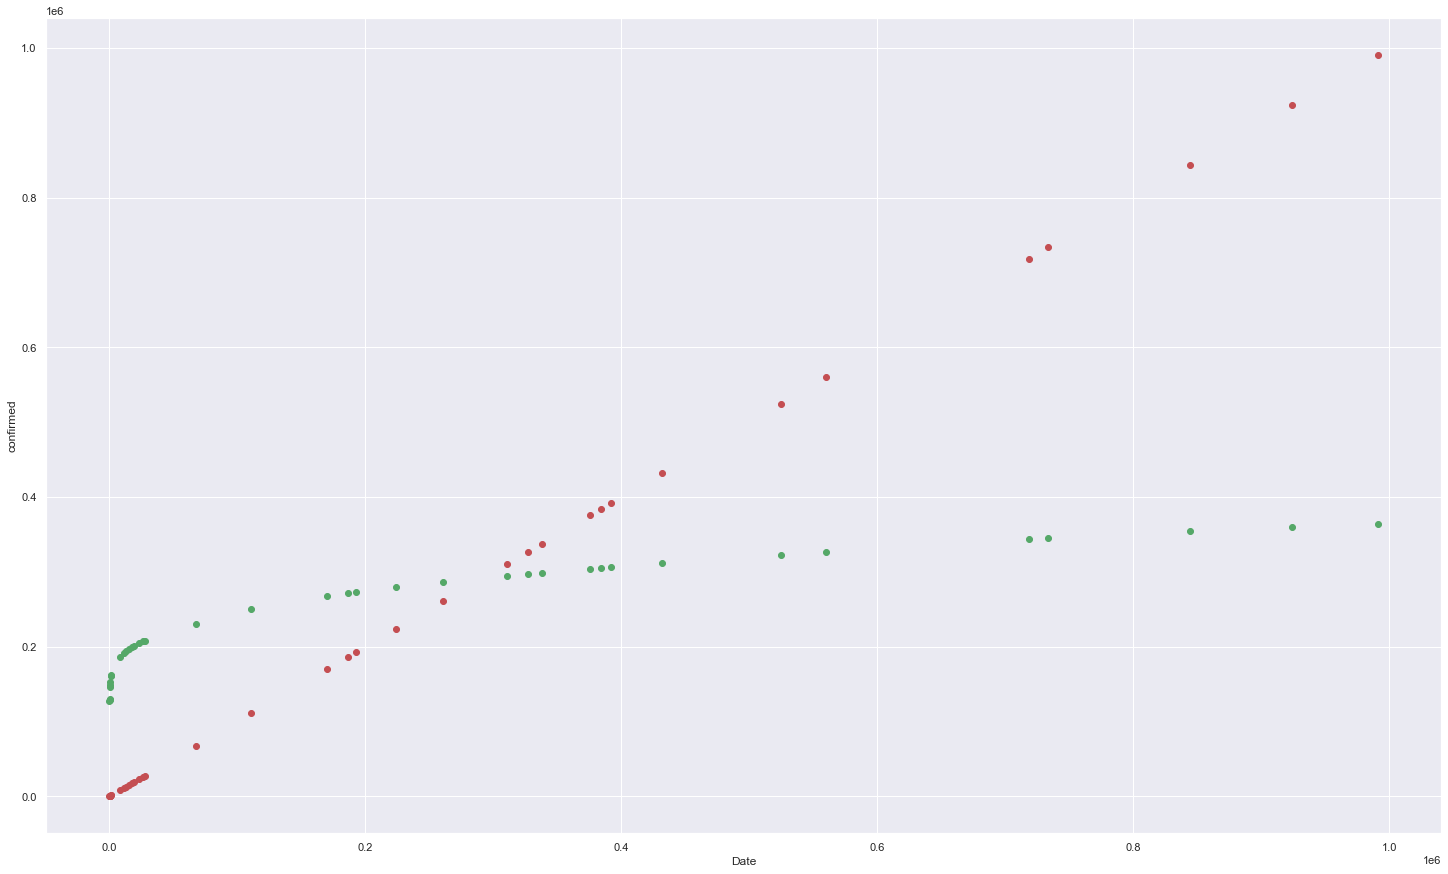

In [91]:
plt.xlabel("Date")
plt.ylabel("confirmed")
plt.scatter(ytested1,ypred1,color="g")
plt.scatter(ytested1,ytest1,color="r")

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
mean_squared_error(ytested,ypred)

64309735428.07895

In [76]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [26]:
x=maha[["date"]]
y=maha[["confirmed"]]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [28]:
model2.fit(xtrain,ytrain)

LinearRegression()

In [29]:
model2.score(xtrain,ytrain)

0.8035011672190008

In [30]:
ypred=model2.predict(xtest)

In [31]:
ypred

array([[ 317509.95362806],
       [ 369954.19734716],
       [ -45229.39876032],
       [ 225732.52712011],
       [ 549138.69671965],
       [ 610323.64772511],
       [ 116473.68603945],
       [ 300028.53905535],
       [-128266.11798191],
       [ 518546.22121716],
       [ 339361.7218442 ],
       [ 479213.03842783],
       [ 133955.10061216],
       [ 286917.47812557],
       [  81510.85689354],
       [ 182028.99068785],
       [   2844.49131489],
       [ 562249.75764942],
       [ -19007.27690125],
       [ 203880.75890398],
       [ 273806.4171958 ],
       [  15955.55224466],
       [-137006.82526827],
       [ 601582.94043875],
       [ 444250.20928192],
       [-171969.65441418],
       [ 356843.13641739],
       [ 243213.94169331],
       [ 426768.79470921],
       [ 592842.23315191],
       [ 627805.06229782],
       [ 177658.63704443],
       [ 391805.9655633 ],
       [ 474842.68478489],
       [ 120844.03968239],
       [ 195140.05161762],
       [ 374324.5509901 ],
 

In [32]:
ytest

,confirmed
3658,180298
4090,260924
819,1364
2902,94041
5530,682383
6020,907212
2020,30706
3514,159133
280,67
5285,595865


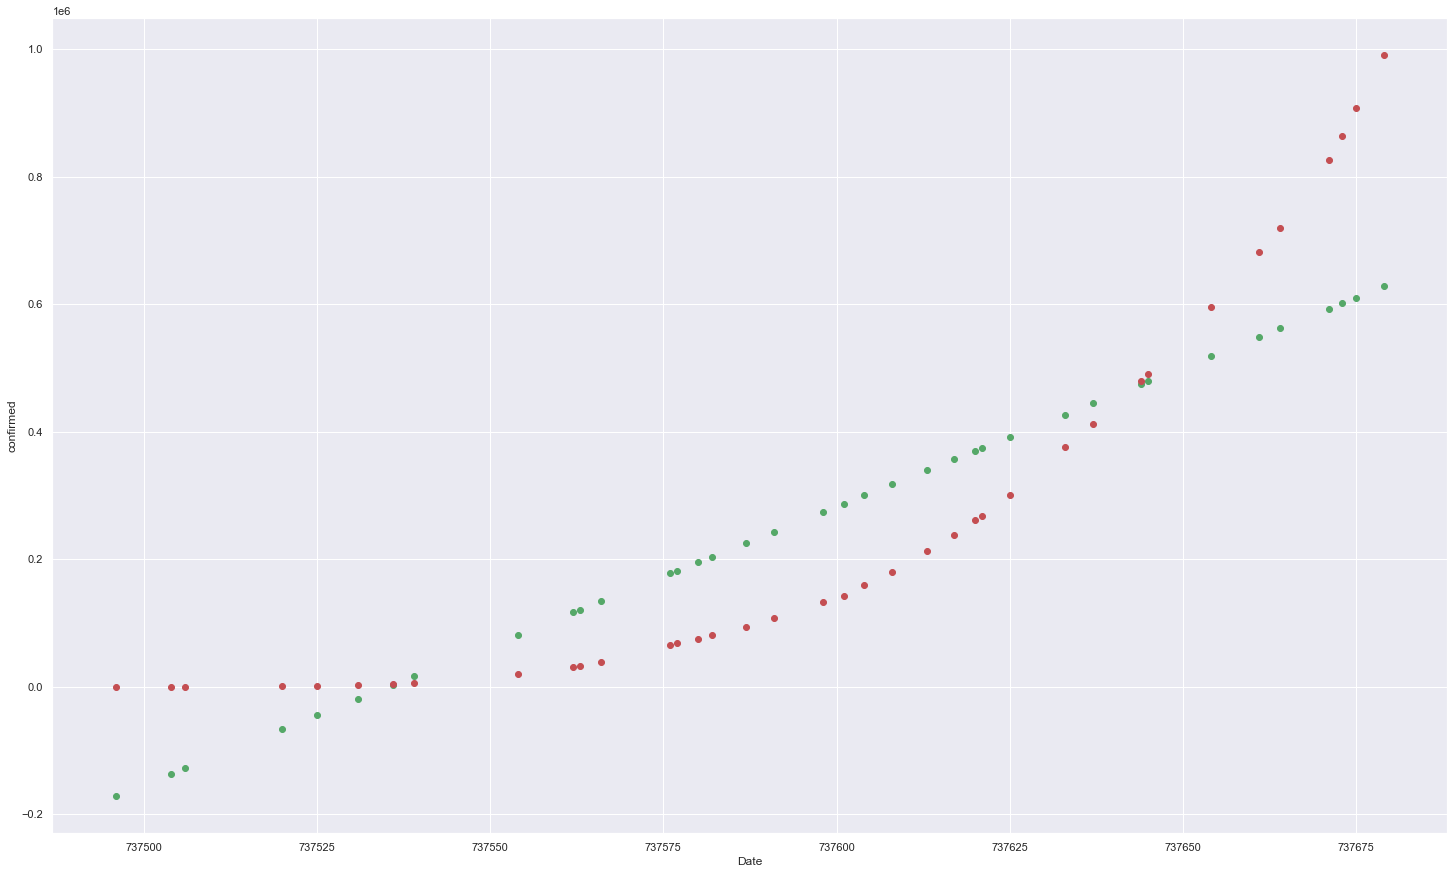

In [35]:
plt.xlabel("Date")
plt.ylabel("confirmed")
plt.scatter(xtest,ypred,color="g")
plt.scatter(xtest,ytest,color="r")

In [77]:
mean_squared_error(ytest,ypred)

64309735428.07895

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
model3=DecisionTreeRegressor()

In [94]:
model3.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [95]:
model3.score(xtrain,ytrain)

1.0

In [96]:
ypred3=model3.predict(xtest)

In [97]:
ypred3

array([1.74761e+05, 2.54427e+05, 1.13500e+03, 9.07870e+04, 6.71942e+05,
       8.83862e+05, 2.91000e+04, 1.52765e+05, 6.30000e+01, 5.84754e+05,
       2.06619e+05, 5.03084e+05, 3.71360e+04, 1.39010e+05, 1.79740e+04,
       7.00130e+04, 4.20300e+03, 7.03823e+05, 2.68700e+03, 7.77930e+04,
       1.28205e+05, 5.65200e+03, 4.70000e+01, 8.43844e+05, 4.00651e+05,
       2.00000e+00, 2.30599e+05, 1.04568e+05, 3.66368e+05, 8.08306e+05,
       9.67349e+05, 6.22280e+04, 2.92589e+05, 4.68265e+05, 3.50580e+04,
       7.23000e+04, 2.75640e+05, 4.90000e+02])

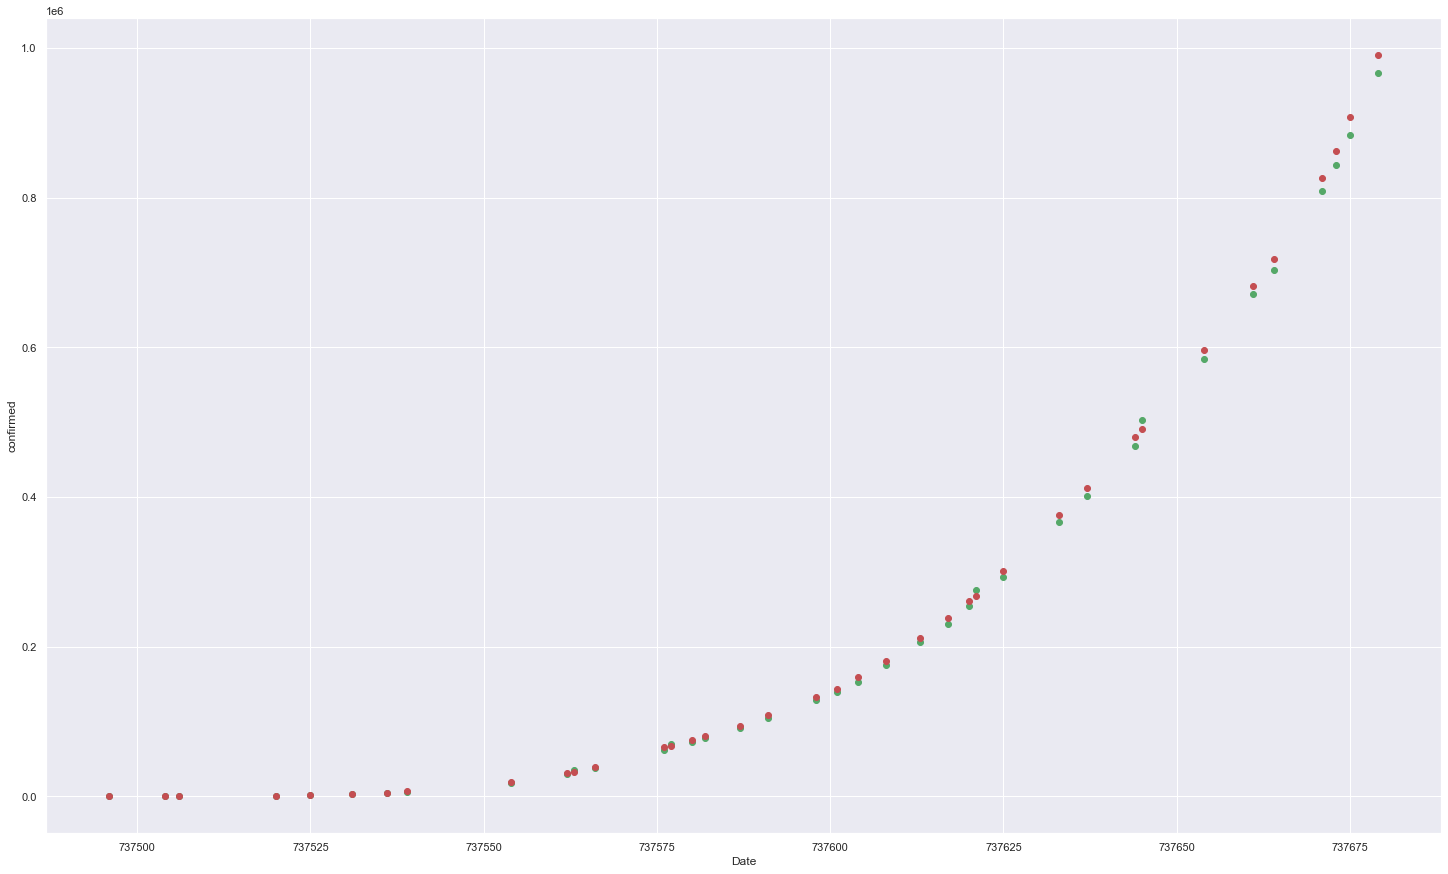

In [98]:
plt.xlabel("Date")
plt.ylabel("confirmed")
plt.scatter(xtest,ypred3,color="g")
plt.scatter(xtest,ytest,color="r")

In [99]:
mean_squared_error(ytest,ypred3)

83212553.42105263